# Classification Trees and Random Forest Classification (supermarket data)

In this notebook, we will use Classification Tree and Random Forest classifiers to predict supermarket brands based on various features like location, population density, brand, and more. We will evaluate the models using feature importance, confusion matrices, and ROC curves.

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest


## Import supermarkets data

In [2]:
# Read and select variables
columns = ['id',
           'bfs_name',
           'bfs_number',
           'lat',
           'lon',
           'brand',
           'pop',
           'pop_dens',
           'frg_pct',
           'emp',
          ]
df_supermarkets_orig = pd.read_csv("./Data/supermarkets_data_enriched.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_supermarkets_orig.shape)

# Brand to upper case letters
df_supermarkets_orig['brand'] = df_supermarkets_orig['brand'].str.upper()

# First records
df_supermarkets_orig.head(5)

(3242, 10)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,SPAR,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,DENNER,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0


## Count and remove missing values

In [3]:
# Count missing values
print(df_supermarkets_orig.isna().sum())

# Remove missing values
df_supermarkets = df_supermarkets_orig.dropna()
df_supermarkets

id               0
bfs_name         0
bfs_number       0
lat              0
lon              0
brand         1233
pop              0
pop_dens         0
frg_pct          0
emp             45
dtype: int64


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,SPAR,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,DENNER,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0
...,...,...,...,...,...,...,...,...,...,...
3230,9584570723,Seedorf (UR),1214,46.881529,8.615975,VOLG,2051,106.379668,6.972209,703.0
3231,9593770082,Bäretswil,111,47.339296,8.839173,VOLG,5053,227.715187,10.152385,1647.0
3233,9624205242,Buch am Irchel,24,47.549645,8.618709,VOLG,979,95.886386,7.252298,200.0
3238,9950926547,Marbach (SG),3253,47.392404,9.569855,VOLG,2110,481.735160,18.578199,678.0


## Extra code snippet (selbsterstellt) zum Ziehen der "Brands"

In [9]:
df_supermarkets['brand'].unique()

array(['SPAR', 'ALDI', 'DENNER', 'LIDL', 'MIGROS', 'COOP',
       'VOI MIGROS PARTNER', 'ALNATURA', 'MIGROS-OUTLET', 'GAZI', 'LANDI',
       'PAM', 'GLOBUS', 'VOLG', 'VOI', 'ZWIBOL', 'CRAI', 'LIDL SCHWEIZ',
       'EUROSPAR', 'PROXI', 'DENNER;MIGROS', 'JUMBO', 'ALDI SUISSE',
       'ROLOG KRINNER COTUB TITAN SERAC MOLOK', 'AVEC'], dtype=object)

## Subset with selected brands

In [ ]:
    ### note that here '.loc' is used to select rows and columns by label instead of 'iloc' which is used to select rows and columns by position, expressed as an integer
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['COOP', 'LIDL'])]
print(df_sub.shape)
df_sub.head()

(548, 10)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
5,39768209,Uznach,3339,47.225069,8.969981,COOP,6489,860.610080,27.862537,3500.0
7,39947904,Zürich,261,47.376732,8.542161,COOP,420217,4778.994655,32.458468,491193.0
10,79977755,Zürich,261,47.340070,8.530546,COOP,420217,4778.994655,32.458468,491193.0
16,265776668,Zürich,261,47.376417,8.559594,COOP,420217,4778.994655,32.458468,491193.0


## Pivot table

In [12]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df_sub[['lat',
                       'lon',
                       'brand',
                       'pop',
                       'pop_dens',
                       'frg_pct',
                       'emp']],
                index=['brand'],
                values=['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp'],
                aggfunc=(np.mean, 'count')).round(0)

emp          frg_pct         lat         lon        pop           \
      count     mean   count  mean count  mean count mean count     mean   
brand                                                                      
COOP    490  59281.0     490  27.0   490  47.0   490  8.0   490  56931.0   
LIDL     58  68817.0      58  30.0    58  47.0    58  8.0    58  64835.0   

      pop_dens          
         count    mean  
brand                   
COOP       490  2019.0  
LIDL        58  1947.0

## Classification Tree
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [13]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['lat',
                                                            'lon',
                                                            'pop', 
                                                            'pop_dens', 
                                                            'frg_pct', 
                                                            'emp']],
                                                    df_sub['brand'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
            lat       lon     pop     pop_dens    frg_pct       emp
286   47.562880  7.597032  173232  7263.396226  37.955459  185432.0
558   46.500919  6.695675   10348  1223.167849  26.555856    3019.0
2601  46.877936  7.031649    4295   220.595788  36.600698    2641.0
1842  46.180200  6.127923   33377  6997.274633  35.021122   19560.0
1542  47.117701  8.391853    5126   592.601156  26.492392    4525.0 

y_train:
286     COOP
558     COOP
2601    COOP
1842    COOP
1542    COOP
Name: brand, dtype: object


### Fit the classification tree model and make predictions

In [14]:
# Initialize the classification tree model 
    ### QUESTION: is the max_depth dependent on the number of features?
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['COOP', 'COOP', 'COOP', 'LIDL', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'LIDL', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP',
       'COOP', 'COOP', 'COOP', 'COOP', 'COOP', 'COOP'], dtype=object)

### Show confusion matrix and classification report

In [ ]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
    ### REVISE this 
print('Classification report')
print(classification_report(y_test, y_pred))

    ### 'Support' is the number of occurences.
    ### 'macro' treats all classes equally, while 'weighted' treats them according to their frequency.

Confusion matrix
[[98  2]
 [10  0]] 

Classification report
              precision    recall  f1-score   support

        COOP       0.91      0.98      0.94       100
        LIDL       0.00      0.00      0.00        10

    accuracy                           0.89       110
   macro avg       0.45      0.49      0.47       110
weighted avg       0.82      0.89      0.86       110



### Print text representation of the classification tree

In [16]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 3589.50
|   |--- frg_pct <= 38.87
|   |   |--- emp <= 299.00
|   |   |   |--- class: LIDL
|   |   |--- emp >  299.00
|   |   |   |--- frg_pct <= 21.58
|   |   |   |   |--- class: COOP
|   |   |   |--- frg_pct >  21.58
|   |   |   |   |--- frg_pct <= 21.72
|   |   |   |   |   |--- class: LIDL
|   |   |   |   |--- frg_pct >  21.72
|   |   |   |   |   |--- class: COOP
|   |--- frg_pct >  38.87
|   |   |--- lon <= 6.80
|   |   |   |--- class: LIDL
|   |   |--- lon >  6.80
|   |   |   |--- lat <= 47.36
|   |   |   |   |--- class: COOP
|   |   |   |--- lat >  47.36
|   |   |   |   |--- class: LIDL
|--- emp >  3589.50
|   |--- lat <= 47.48
|   |   |--- frg_pct <= 50.09
|   |   |   |--- lat <= 47.47
|   |   |   |   |--- pop <= 3485.00
|   |   |   |   |   |--- class: LIDL
|   |   |   |   |--- pop >  3485.00
|   |   |   |   |   |--- class: COOP
|   |   |   |--- lat >  47.47
|   |   |   |   |--- class: LIDL
|   |   |--- frg_pct >  50.09
|   |   |   |--- class: LIDL
|   |--- lat >  47.

## Visualize the classification tree

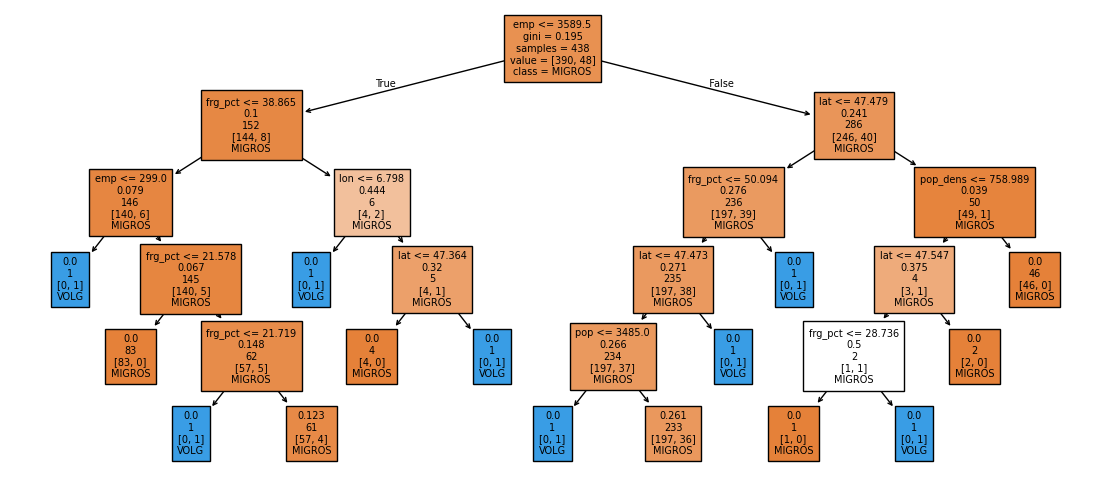

In [17]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['MIGROS', 'VOLG'],
                   filled=True,
                   fontsize=7,
                   label='root')

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [18]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['lat',
                                                                'lon',
                                                                'pop', 
                                                                'pop_dens', 
                                                                'frg_pct', 
                                                                'emp']],
                                                        df_sub['brand'], 
                                                        test_size=0.20, 
                                                        random_state=5)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
            lat       lon     pop     pop_dens    frg_pct       emp
2237  47.075719  7.305873   15525  1046.864464  18.962963    8495.0
281   47.569095  7.579643  173232  7263.396226  37.955459  185432.0
2098  46.893384  7.497596   11572   497.506449  14.630142    5046.0
1784  47.346995  7.908674   18399  1601.305483  29.278765   22016.0
2727  47.489165  7.500171    1166   698.203593  14.493997     486.0 

y2_train:
2237    LIDL
281     COOP
2098    COOP
1784    COOP
2727    COOP
Name: brand, dtype: object


### Fit the Random Forest Classifier

In [19]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)

# Train the classification tree model
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable
y_pred_rf = rfc.predict(X2_test)

# Crosstab
print('Brand versus predicted brand:', '\n')
df_pred = pd.DataFrame(data={'brand': y2_test, 
                             'brand_predicted': y_pred_rf}).reset_index(drop=True)
df_pred

Brand versus predicted brand: 



,brand,brand_predicted
0,COOP,COOP
1,COOP,COOP
2,COOP,COOP
3,COOP,COOP
4,COOP,COOP
...,...,...
105,COOP,COOP
106,COOP,COOP
107,COOP,COOP
108,LIDL,COOP


### Show confusion matrix and classification report

In [20]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[101   0]
 [  9   0]] 

Classification report
              precision    recall  f1-score   support

        COOP       0.92      1.00      0.96       101
        LIDL       0.00      0.00      0.00         9

    accuracy                           0.92       110
   macro avg       0.46      0.50      0.48       110
weighted avg       0.84      0.92      0.88       110



### Show feature importance

Index(['lat', 'lon', 'emp', 'frg_pct', 'pop', 'pop_dens'], dtype='object')
[0.21535074 0.20322955 0.16942749 0.14618602 0.13488316 0.13092304]


<Axes: ylabel='features'>

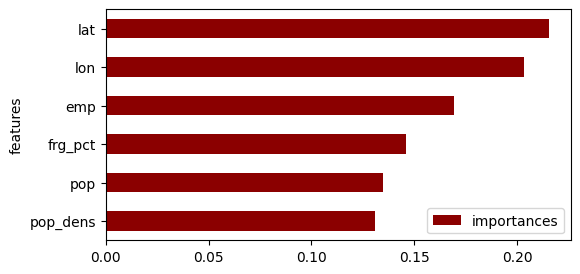

In [21]:
cols = X2_train.columns

# Derive feature importance from the random forest classifier
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### ROC curve and AUC

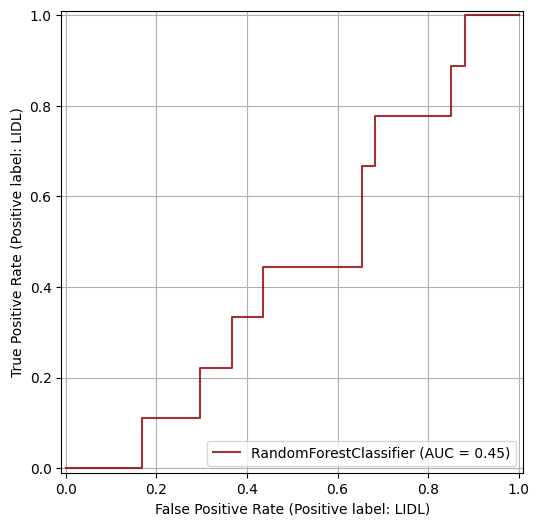

In [ ]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,6))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.grid()
plt.show()

    ### The ROC curve is a graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.
    ### The AUC is the area under the ROC curve. It is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal).
    ### The closer the AUC is to 1, the better the parameter is at distinguishing between the two groups.
    ### The closer the AUC is to 0.5, the worse the parameter is at distinguishing between the two groups.
    ### An AUC of 0.5 means that the parameter is no better than random at distinguishing between the two groups.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [23]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-05 12:15:35
Python Version: 3.11.10
-----------------------------------
